In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind


# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Import API key. Renamed mine
#from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Our Clean Netflix data (CSV)
output_data_file = "NetflixDF4.csv"

# Read the CSV
netflix_df = pd.read_csv(output_data_file)

# Display the data table for preview
netflix_df.head(20)

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0
6,s30,Paranoia,2013,Movie,PG-13,United States,Thrillers,106.0
7,s42,Jaws,1975,Movie,PG,United States,Action & Adventure,124.0
8,s43,Jaws 2,1978,Movie,PG,United States,Dramas,116.0
9,s44,Jaws 3,1983,Movie,PG,United States,Action & Adventure,98.0


In [2]:
netflix_df.rating.value_counts()

R        1604
PG-13    1207
PG        614
G          86
NR         47
Name: rating, dtype: int64

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [4]:
# i am doing 3 different models based on country
# United States 
genre = "Dramas"
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom') & (netflix_df["genre"]== genre)]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0
63,s192,Wind River,2017,Movie,R,United Kingdom,Dramas,107.0
135,s403,The Last Letter From Your Lover,2021,Movie,R,United Kingdom,Dramas,111.0
173,s577,Mary Magdalene,2019,Movie,R,United Kingdom,Dramas,120.0
179,s586,Ophelia,2018,Movie,PG-13,United Kingdom,Dramas,106.0


In [5]:
#using hmk 5
corrs= uk_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.262059
duration,-0.262059,1.000000


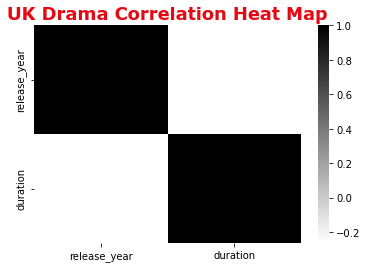

In [6]:
sns.heatmap(corrs, cmap = "binary")
plt.title("UK Drama Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.UK Drama Correlation Heat Map.png")
plt.show()

In [7]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [8]:
corr=(st.pearsonr(uk_df['release_year'],uk_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.26205939782775345, 0.009901340454358754)


The r-squared is: 0.0686751279898453


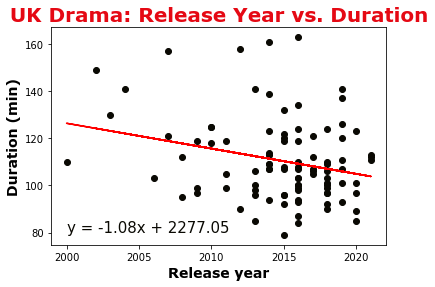

In [9]:
#linear regression model like in class activity day 3 act 9

x_values = uk_df['release_year']
y_values = uk_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('UK Drama: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.UK Drama Release Year vs. Duration.png")
plt.show()

In [10]:
feature = uk_df[["release_year"]]
target = uk_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.931
Date:                Fri, 11 Feb 2022   Prob (F-statistic):            0.00990
Time:                        16:59:29   Log-Likelihood:                -407.64
No. Observations:                  96   AIC:                             819.3
Df Residuals:                      94   BIC:                             824.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2277.0494    822.882      2.767      0.007     643.197    3910.902
release_year    -1.0753      0.408     -2.633      0.010      -1.886      -0.264
==============================================================================
Omnibus:                       14.656   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.150
Skew:                           0.915   Prob(JB):                     0.000311
Kurtosis:                       3.831   Cond. No.                     9.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# both my r2 are the same and my coeficcients

In [12]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.07530309]
2277.0494474397547


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
actual = uk_df["duration"]
predictions = reg.predict(uk_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.06867512798984421
MSE: 285.5981086106065
RMSE: 16.899648180083705
MAE: 13.05168089025247


#booth
#5.7% of the variance of duration is explained by releas year

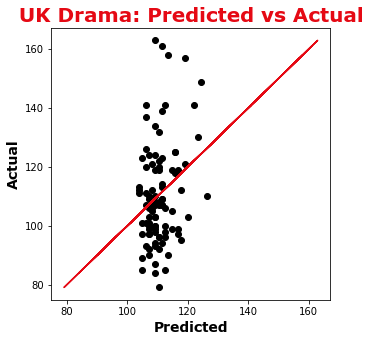

In [15]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK Drama: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.UK Drama Predicted vs Actual.png")
plt.show()

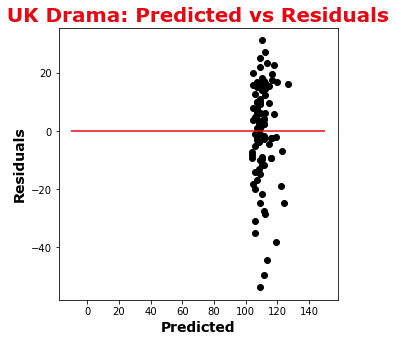

In [16]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK Drama: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.UK Drama Predicted vs Residuals.png")
plt.show()

In [17]:
uk_df.describe()

,release_year,duration
count,96.000000,96.000000
mean,2014.739583,110.593750
std,4.290123,17.603575
min,2000.000000,79.000000
25%,2013.000000,98.750000
50%,2016.000000,107.000000
75%,2018.000000,120.000000
max,2021.000000,163.000000


# HORROR MOVIES

In [18]:
# i am doing 3 different models based on country
# United States 
genre = "Horror Movies"
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom') & (netflix_df["genre"]== genre)]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
527,s1649,Ghosts of War,2020,Movie,R,United Kingdom,Horror Movies,95.0
572,s1776,His House,2020,Movie,PG-13,United Kingdom,Horror Movies,93.0
1294,s4134,Await Further Instructions,2018,Movie,R,United Kingdom,Horror Movies,91.0
1430,s4511,Apostle,2018,Movie,R,United Kingdom,Horror Movies,130.0
1437,s4533,Malevolent,2018,Movie,R,United Kingdom,Horror Movies,89.0


In [19]:
#using hmk 5
corrs= uk_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.054511
duration,-0.054511,1.000000


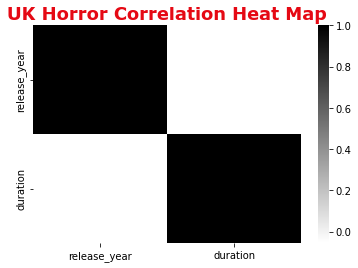

In [20]:
sns.heatmap(corrs, cmap = "binary")
plt.title("UK Horror Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.UK Horror Correlation Heat Map.png")
plt.show()

In [21]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [22]:
corr=(st.pearsonr(uk_df['release_year'],uk_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.05451075280697161, 0.8299035108193331)


The r-squared is: 0.0029714221715827624


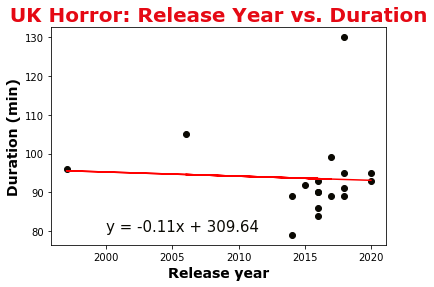

In [23]:
#linear regression model like in class activity day 3 act 9

x_values = uk_df['release_year']
y_values = uk_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('UK Horror: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.UK Horror Release Year vs. Duration.png")
plt.show()

In [24]:
feature = uk_df[["release_year"]]
target = uk_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\yvonne\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                   0.04768
Date:                Fri, 11 Feb 2022   Prob (F-statistic):              0.830
Time:                        16:59:31   Log-Likelihood:                -67.710
No. Observations:                  18   AIC:                             139.4
Df Residuals:                      16   BIC:                             141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          309.6424    989.304      0.313      0.758   -1787.588    2406.873
release_year    -0.1072      0.491     -0.218      0.830      -1.148       0.934
==============================================================================
Omnibus:                       26.296   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.664
Skew:                           2.260   Prob(JB):                     8.97e-10
Kurtosis:                       8.926   Cond. No.                     7.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# both my r2 are the same and my coeficcients

In [26]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.10720562]
309.64235500878726


In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
actual = uk_df["duration"]
predictions = reg.predict(uk_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.0029714221715834155
MSE: 108.35915836750627
RMSE: 10.409570517917935
MAE: 6.306776020308528


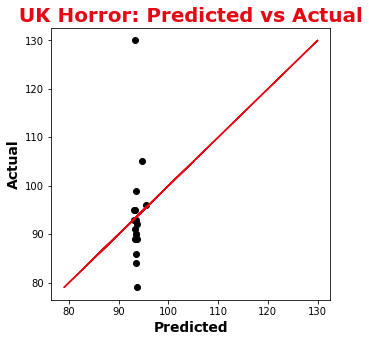

In [29]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK Horror: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.UK Horror Predicted vs Actual.png")
plt.show()

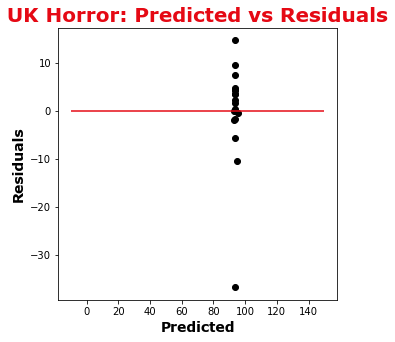

In [30]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK Horror: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.UK Horror Predicted vs Residuals.png")
plt.show()

# ACTION AND ADVENTURE

In [31]:
# i am doing 3 different models based on country
# United States 
genre = "Action & Adventure"
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom') & (netflix_df["genre"]== genre)]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101.0
57,s178,The Guns of Navarone,1961,Movie,PG-13,United Kingdom,Action & Adventure,156.0
292,s933,Green Zone,2010,Movie,R,United Kingdom,Action & Adventure,115.0
328,s1034,Rush,2013,Movie,R,United Kingdom,Action & Adventure,123.0
385,s1191,Skylines,2020,Movie,R,United Kingdom,Action & Adventure,113.0


In [32]:
#using hmk 5
corrs= uk_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.433659
duration,-0.433659,1.000000


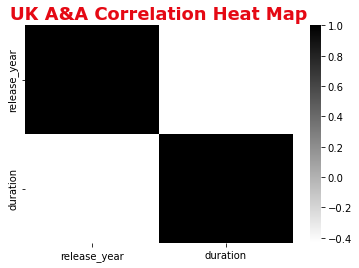

In [33]:
sns.heatmap(corrs, cmap = "binary")
plt.title("UK A&A Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.UK A&A Correlation Heat Map.png")
plt.show()

In [34]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [35]:
corr=(st.pearsonr(uk_df['release_year'],uk_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.4336588854625788, 0.0013198104609115425)


The r-squared is: 0.18806002894064716


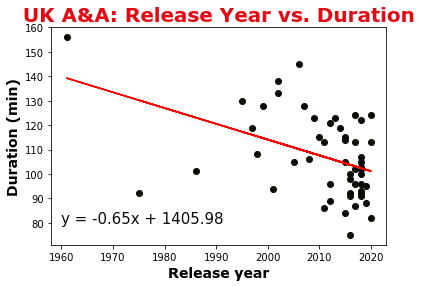

In [36]:
#linear regression model like in class activity day 3 act 9

x_values = uk_df['release_year']
y_values = uk_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1960,80),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('UK A&A: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.UK A&A Release Year vs. Duration.png")
plt.show()

In [37]:
feature = uk_df[["release_year"]]
target = uk_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     11.58
Date:                Fri, 11 Feb 2022   Prob (F-statistic):            0.00132
Time:                        16:59:33   Log-Likelihood:                -215.70
No. Observations:                  52   AIC:                             435.4
Df Residuals:                      50   BIC:                             439.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1405.9847    381.642      3.684      0.001     639.434    2172.535
release_year    -0.6460      0.190     -3.403      0.001      -1.027      -0.265
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   2.520
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.582
Skew:                          -0.076   Prob(JB):                        0.747
Kurtosis:                       2.504   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# both my r2 are the same and my coeficcients

In [39]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.64595746]
1405.984742726893


In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
actual = uk_df["duration"]
predictions = reg.predict(uk_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.18806002894064666
MSE: 234.70920499945066
RMSE: 15.32022209367249
MAE: 12.776105985807616


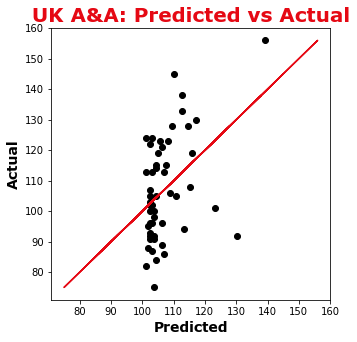

In [42]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK A&A: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.UK A&A Predicted vs Actual.png")
plt.show()

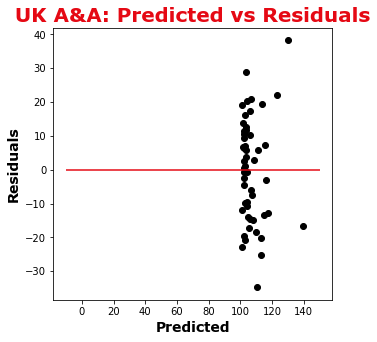

In [43]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("UK A&A: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.UK A&A Predicted vs Residuals.png")
plt.show()